# Downloading the necassary packages

In [ ]:
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git
!wget https://raw.githubusercontent.com/AI4Finance-Foundation/FinRL/master/requirements.txt
!pip install -r requirements.txt
!pip install stable_baselines3 sb3_contrib

# Configuration

In [1]:
import gc
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

gc.collect()
torch.cuda.empty_cache()

# Seed everything for reproducible results
seed = 5
np.random.seed(seed)
np.random.default_rng(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Downloading the Datasets

We can use **YahooDownloader** from **finlr** library and specify the start_date, end_date, and tickers_list parameters to achieve our dataset of 5 different(Nvidia, Apple, Microsoft, Google and Amazon) stocks.

First we check if the dataset exists in the specified path or not; If it exists I load it otherwise I use YahooDownloader to download it.

In [2]:
import pandas as pd
import os

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader

In [3]:
dataset_path = 'dow_30_2009_2020.csv'

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
tickers = ['AAPL', 'MSFT', 'INTC', 'VZ', 'KO', 'PFE', 'MRK', 'GS', 'JPM', 'RTX',
                  'AXP', 'IBM', 'CSCO', 'BA', 'CAT', 'DIS', 'TRV', 'MMM', 'NKE', 'WBA',
                  'WMT', 'CVX', 'XOM', 'JNJ', 'PG', 'UNH', 'V', 'HD', 'MCD', 'DD']



start_date = '2009-01-01'
end_date = '2020-05-08'

if not os.path.exists(dataset_path):
    df = YahooDownloader(start_date=start_date, end_date=end_date, ticker_list=tickers).fetch_data()
    df.to_csv(dataset_path)
    print('Successfully downloaded and saved the dataset!')
else:
    df = pd.read_csv(dataset_path)
    print("Successfully loaded the dataset")



Successfully loaded the dataset


## Checking the dataset

In [5]:
df.head(30)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,datadate,tic,prccd,ajexdi,prcod,prchd,prcld,cshtrd
0,0,20090102,AXP,19.33,1.0,18.57,19.5200,18.40,10955620.0
1,1,20090105,AXP,19.95,1.0,19.20,20.2400,19.00,16019130.0
2,2,20090106,AXP,21.07,1.0,20.30,21.3800,20.01,13819380.0
3,3,20090107,AXP,20.01,1.0,20.53,20.7200,19.83,15699820.0
4,4,20090108,AXP,20.04,1.0,19.80,20.1700,19.40,12255070.0
5,5,20090109,AXP,19.23,1.0,20.16,20.3000,19.17,12592110.0
6,6,20090112,AXP,18.83,1.0,19.01,19.4300,18.55,12252580.0
7,7,20090113,AXP,18.99,1.0,18.64,19.3857,18.41,11864760.0
8,8,20090114,AXP,17.83,1.0,18.43,18.6700,17.70,17039810.0
9,9,20090115,AXP,17.32,1.0,18.18,18.3900,16.74,25799270.0


In [6]:
# Assuming your original dataframe is called df
# 1. Rename the columns to the desired structure
df = df.rename(columns={
    'datadate': 'date',
    'prcod': 'open',
    'prchd': 'high',
    'prcld': 'low',
    'prccd': 'close',
    'cshtrd': 'volume',
})

# 2. Convert 'date' to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# 3. Add a 'day' column representing the day of the week (Monday=0, Sunday=6)
df['day'] = df['date'].dt.dayofweek

# 4. Reorder columns to match the desired structure
df = df[['date', 'open', 'high', 'low', 'close', 'volume', 'tic', 'day']]

# Display the updated dataframe
df.head()


,date,open,high,low,close,volume,tic,day
0,2009-01-02,18.57,19.52,18.40,19.33,10955620.0,AXP,4
1,2009-01-05,19.20,20.24,19.00,19.95,16019130.0,AXP,0
2,2009-01-06,20.30,21.38,20.01,21.07,13819380.0,AXP,1
3,2009-01-07,20.53,20.72,19.83,20.01,15699820.0,AXP,2
4,2009-01-08,19.80,20.17,19.40,20.04,12255070.0,AXP,3


# Preprocessing data

In this step, we want to add the indicators mentioned in the paper(MACD, RSI, CCI, and ADX) and also need a turbulence threshold. To achieve these goals we can use **FeatureEngineer** from **finlr** library.

This class first cleans the data (deals with missing values) and then based on our given parameters does our required preprocessing.

    Attributes
    ----------
        use_technical_indicator : boolean
            we technical indicator or not
        tech_indicator_list : list
            a list of technical indicator names (modified from neofinrl_config.py)
        use_turbulence : boolean
            use turbulence index or not
        user_defined_feature:boolean
            use user defined features or not

In [7]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
indicator_list = ['macd', 'rsi', 'cci', 'adx']

df = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list=indicator_list,
                     use_turbulence=True).preprocess_data(df)

Successfully added technical indicators
Successfully added turbulence index


## Checking the dataset after preprocessing

In [9]:
df.head(15)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,tic,day,macd,rsi,cci,adx,turbulence
0,2009-01-02,85.88,91.04,85.160,90.75,26641980.0,AAPL,4,0.0,100.0,66.666667,100.0,0.0
1,2009-01-02,18.57,19.52,18.400,19.33,10955620.0,AXP,4,0.0,100.0,66.666667,100.0,0.0
2,2009-01-02,42.80,45.56,42.780,45.25,7010171.0,BA,4,0.0,100.0,66.666667,100.0,0.0
3,2009-01-02,44.91,46.98,44.710,46.91,7116726.0,CAT,4,0.0,100.0,66.666667,100.0,0.0
4,2009-01-02,16.41,17.00,16.250,16.96,40977480.0,CSCO,4,0.0,100.0,66.666667,100.0,0.0
5,2009-01-02,74.23,77.30,73.580,76.52,13695840.0,CVX,4,0.0,100.0,66.666667,100.0,0.0
6,2009-01-02,15.18,15.50,14.750,15.41,18859390.0,DD,4,0.0,100.0,66.666667,100.0,0.0
7,2009-01-02,22.76,24.03,22.500,23.92,9796596.0,DIS,4,0.0,100.0,66.666667,100.0,0.0
8,2009-01-02,84.02,87.62,82.190,86.76,14087610.0,GS,4,0.0,100.0,66.666667,100.0,0.0
9,2009-01-02,23.07,24.19,22.960,24.13,14902490.0,HD,4,0.0,100.0,66.666667,100.0,0.0


## Splitting the dataset into train and test datasets

In [10]:

# df_train = df[df.date <= '2022-01-01']
# df_test = df[df.date >= '2022-01-02']

df_train = df[df.date <= '2015-12-31']
df_test = df[df.date >= '2016-01-01']

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
print('Training dataset shape:', df_train.shape)
print('Testing dataset shape:', df_test.shape)

Training dataset shape: (52860, 13)
Testing dataset shape: (34920, 13)


# Environment utils

In [12]:
import numpy as np
import pandas as pd
import gymnasium as gym

from finrl.meta.env_stock_trading.env_stocktrading_np import StockTradingEnv

## Turbulence Threshold (3.1.4.)

Considering the paper, I set the turbulence threshold to 90th percentile
of all historical turbulence indexes. If $turbulence_t$ is greater than this
threshold, it means that extreme market conditions are occurring and
the agent will stop trading until the turbulence index falls below this
threshold.


In [13]:
def turbulence_threshold(df, percentile):
  turbulence_index = df['turbulence']

  # Calculate the 90th percentile for turbulence threshold
  turbulence_thresh = np.percentile(turbulence_index, percentile)
  return turbulence_thresh


## Extracting necassary data for env

In [14]:
def df_to_array(
        df: pd.DataFrame, tech_indicator_list: list[str], if_vix: bool
    ) -> list[np.ndarray]:
        df = df.copy()
        unique_ticker = df.tic.unique()
        if_first_time = True
        for tic in unique_ticker:
            if if_first_time:
                price_array = df[df.tic == tic][["close"]].values
                tech_array = df[df.tic == tic][tech_indicator_list].values
                if if_vix:
                    turbulence_array = df[df.tic == tic]["VIXY"].values
                else:
                    turbulence_array = df[df.tic == tic]["turbulence"].values
                if_first_time = False
            else:
                price_array = np.hstack(
                    [price_array, df[df.tic == tic][["close"]].values]
                )
                tech_array = np.hstack(
                    [tech_array, df[df.tic == tic][tech_indicator_list].values]
                )
        return price_array, tech_array, turbulence_array

# Training Environment

## Turbulence Threshold

Calculating turbulence threshold for the training dataset.

In [15]:
turbulence_thresh = turbulence_threshold(df_train, 90)
print('The turbulence threshold for the train dataset:', turbulence_thresh)

The turbulence threshold for the train dataset: 59.73484290319578


## Training env parameters

According to the **paper** some necessary constraints need to be added to the mutltistock trading environment



1.   Initial capital: \$1 million.
2.   Maximum number of shares in a single trade $h_{max}$: 100.
3.   Reward scaling factor: 1e-4, which means the reward returned by the environment will be only 1e-4 of the original one.



In [16]:
# initial amount of money we have in our account
initial_account_balance=1000000

reward_scaling = 1e-4

if_vix = False
price_array, tech_array, turbulence_array = df_to_array(df_train, indicator_list,if_vix)
env_config = {
        "price_array": price_array,
        "tech_array": tech_array,
        "turbulence_array": turbulence_array,
        "if_train": True,
    }

In [18]:
price_array.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1762, 30)

In [19]:
tech_array.shape

(1762, 120)

In [20]:
price_array[0]

array([90.75, 19.33, 45.25, 46.91, 16.96, 76.52, 15.41, 23.92, 86.76,
       24.13, 87.37, 15.2 , 60.65, 31.35, 45.9 , 63.75, 59.19, 31.  ,
       20.33, 53.06, 18.27, 62.8 , 54.95, 45.2 , 27.59, 53.44, 34.64,
       25.55, 57.18, 81.64])

In [27]:
import numpy as np
from collections import deque

class SequenceLengthWrapper(gym.Wrapper):
    def __init__(self, env, seq_len=30):
        super(SequenceLengthWrapper, self).__init__(env)
        self.seq_len = seq_len
        self.obs_buffer = deque(maxlen=seq_len)
        # Adjust observation space to return sequence of observations
        self.observation_space = gym.spaces.Box(
            low=np.repeat(self.env.observation_space.low[np.newaxis, :], seq_len, axis=0),
            high=np.repeat(self.env.observation_space.high[np.newaxis, :], seq_len, axis=0),
            dtype=self.env.observation_space.dtype
        )

    def reset(self, *, seed=seed, options=None):
        # print('seed is', seed)
        # Reset the environment and clear buffer
        obs = self.env.reset(seed=seed, options=options)
        # print(obs.shape)
        self.obs_buffer.clear()

        for _ in range(self.seq_len):
          self.obs_buffer.append(obs[0])

        # print(self.obs_buffer.shape)
        return self.obs_buffer, {}

    def step(self, action):
        # print('In the wrapper function', action)
        obs, reward, done, info, _ = self.env.step(action)
        self.obs_buffer.append(obs)
        return self.obs_buffer, reward, done, info, dict()


## Making the environment

In [28]:
from __future__ import annotations

import gymnasium as gym
import numpy as np
from numpy import random as rd


class StockTradingEnv(gym.Env):
    def __init__(
        self,
        config,
        initial_account=1e6,
        gamma=0.99,
        turbulence_thresh=99,
        min_stock_rate=0.1,
        max_stock=1e2,
        initial_capital=1e6,
        buy_cost_pct=1e-3,
        sell_cost_pct=1e-3,
        reward_scaling=2**-11,
        initial_stocks=None,
    ):
        price_ary = config["price_array"]
        tech_ary = config["tech_array"]
        turbulence_ary = config["turbulence_array"]
        if_train = config["if_train"]
        self.price_ary = price_ary.astype(np.float32)
        self.tech_ary = tech_ary.astype(np.float32)
        self.turbulence_ary = turbulence_ary

        self.tech_ary = self.tech_ary * 2**-7
        self.turbulence_bool = (turbulence_ary > turbulence_thresh).astype(np.float32)
        self.turbulence_ary = (
            self.sigmoid_sign(turbulence_ary, turbulence_thresh) * 2**-5
        ).astype(np.float32)

        stock_dim = self.price_ary.shape[1]
        self.gamma = gamma
        self.max_stock = max_stock
        self.min_stock_rate = min_stock_rate
        self.buy_cost_pct = buy_cost_pct
        self.sell_cost_pct = sell_cost_pct
        self.reward_scaling = reward_scaling
        self.initial_capital = initial_capital
        self.initial_stocks = (
            np.zeros(stock_dim, dtype=np.float32)
            if initial_stocks is None
            else initial_stocks
        )

        # reset()
        self.day = None
        self.amount = None
        self.stocks = None
        self.total_asset = None
        self.gamma_reward = None
        self.initial_total_asset = None

        # environment information
        self.env_name = "StockEnv"
        # amount + (turbulence, turbulence_bool) + (price, stock) * stock_dim + tech_dim
        self.state_dim = 1 + 2 + 3 * stock_dim + self.tech_ary.shape[1]

        self.stocks_cd = None
        self.action_dim = stock_dim
        self.max_step = self.price_ary.shape[0] - 1
        self.if_train = if_train
        self.if_discrete = False
        self.target_return = 10.0
        self.episode_return = 0.0
        self.keep_price = deque(maxlen=30)

        self.observation_space = gym.spaces.Box(
            low=-3000, high=3000, shape=(self.state_dim,), dtype=np.float32
        )
        self.action_space = gym.spaces.Box(
            low=-1, high=1, shape=(self.action_dim,), dtype=np.float32
        )

    def reset(
        self,
        *,
        seed=seed,
        options=None,
    ):
        self.day = 0
        price = self.price_ary[self.day]

        if self.if_train:
            self.stocks = (
                self.initial_stocks + rd.randint(0, 64, size=self.initial_stocks.shape)
            ).astype(np.float32)
            self.stocks_cool_down = np.zeros_like(self.stocks)
            self.amount = (
                self.initial_capital * rd.uniform(0.95, 1.05)
                - (self.stocks * price).sum()
            )
        else:
            self.stocks = self.initial_stocks.astype(np.float32)
            self.stocks_cool_down = np.zeros_like(self.stocks)
            self.amount = self.initial_capital

        self.total_asset = self.amount + (self.stocks * price).sum()
        self.initial_total_asset = self.total_asset
        self.gamma_reward = 0.0
        return self.get_state(price), {}  # state

    def step(self, actions):
        actions = (actions * self.max_stock).astype(int)

        self.day += 1
        price = self.price_ary[self.day]
        self.stocks_cool_down += 1

        if self.turbulence_bool[self.day] == 0:
            min_action = int(self.max_stock * self.min_stock_rate)  # stock_cd
            for index in np.where(actions < -min_action)[0]:  # sell_index:
                if price[index] > 0:  # Sell only if current asset is > 0
                    sell_num_shares = min(self.stocks[index], -actions[index])
                    self.stocks[index] -= sell_num_shares
                    self.amount += (
                        price[index] * sell_num_shares * (1 - self.sell_cost_pct)
                    )
                    self.stocks_cool_down[index] = 0
            for index in np.where(actions > min_action)[0]:  # buy_index:
                if (
                    price[index] > 0
                ):  # Buy only if the price is > 0 (no missing data in this particular date)
                    buy_num_shares = min(self.amount // price[index], actions[index])
                    self.stocks[index] += buy_num_shares
                    self.amount -= (
                        price[index] * buy_num_shares * (1 + self.buy_cost_pct)
                    )
                    self.stocks_cool_down[index] = 0

        else:  # sell all when turbulence
            self.amount += (self.stocks * price).sum() * (1 - self.sell_cost_pct)
            self.stocks[:] = 0
            self.stocks_cool_down[:] = 0

        state = self.get_state(price)
        total_asset = self.amount + (self.stocks * price).sum()
        reward = (total_asset - self.total_asset) * self.reward_scaling
        self.total_asset = total_asset

        self.gamma_reward = self.gamma_reward * self.gamma + reward
        done = self.day == self.max_step
        if done:
            reward = self.gamma_reward
            self.episode_return = total_asset / self.initial_total_asset

        return state, reward, done, False, dict()

    def get_state(self, price):
        amount = np.array(self.amount * (2**-12), dtype=np.float32)
        scale = np.array(2**-6, dtype=np.float32)
        return np.hstack(
            (
                amount,
                self.turbulence_ary[self.day],
                self.turbulence_bool[self.day],
                price * scale,
                # final_prices * scale,
                # price,
                self.stocks * scale,
                self.stocks_cool_down,
                self.tech_ary[self.day],
            )
        )  # state.astype(np.float32)

    @staticmethod
    def sigmoid_sign(ary, thresh):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x * np.e)) - 0.5

        return sigmoid(ary / thresh) * thresh

In [29]:
env_instance = StockTradingEnv(config=env_config,
                               initial_account=initial_account_balance,
                               reward_scaling=reward_scaling,
                               turbulence_thresh=turbulence_thresh)
env_instance = SequenceLengthWrapper(env_instance, seq_len=5)

In [30]:
print('Observation space shape:', env_instance.observation_space.shape)
print('Action space shape:', env_instance.action_space.shape)

Observation space shape: (5, 213)
Action space shape: (30,)


In [32]:
def rule_based_actions():
  env = env_instance.unwrapped

  today_price = env.price_ary[env.day]
  tommorrow_price = env.price_ary[env.day + 1]
  return compute_actions(tommorrow_price, today_price) / 100





In [33]:
def compute_actions(tommorrow_prices, today_prices):
  print(tommorrow_prices)
  print(today_prices)
  env = env_instance.unwrapped
  keep = dict()
  actions = np.zeros(30)
  rate = (tommorrow_prices - today_prices) / today_prices
  print(rate)
  keep = dict((tic, rate[i]) for i, tic in enumerate(tickers))
  amount = env.amount
  sell_stock = [i for i, rate in enumerate(keep.values()) if rate < 0]
  actions[sell_stock] = -env.stocks[sell_stock]
  amount += sum(today_prices[sell_stock] * actions[sell_stock] * (1 - env.sell_cost_pct))

  buy_candidates = sorted(
        [tickers.index(ticker) for ticker, rate in keep.items() if rate > 0],
        key=lambda idx: rate[idx],
        reverse=True
  )
  for idx in buy_candidates:
    actions[idx] = min(amount // today_prices[idx], 100)
    amount -= (actions[idx] * today_prices[idx] * (1 + env.buy_cost_pct))


  return actions


# Stock Trading Agent

In [35]:
import torch
import torch.nn as nn
import gymnasium as gym

from collections import deque
from sb3_contrib import RecurrentPPO
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

## Feature extractor hyperparameters

In [36]:
time_window = 30
pre_hidden_size = 128
pre_layer_dim = 1

## PPO hyperparameters

In [37]:
gamma = 0.99
learning_rate = 3e-4
clip_range = 0.2
ent_coef = 0.01
max_grad_norm = 0.5
vf_coef = 0.5
n_steps = 128
n_epochs = 4
gae_lambda = 0.95
hidden_size = 512

## Save Paths

The paths for saving the trained PPO model and the path for saving the training logs.

In [38]:
model_save_path = f'ppo_stock_trading_tw_{time_window}_hs_{hidden_size}_v3'

## $LSTM_{pre}$ as feature extractor

In [39]:
class CustomLSTMExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.spaces.Box, features_dim: int = 128, hidden_size: int = 128, layer_dim: int = 1, time_window: int = 30):
        super(CustomLSTMExtractor, self).__init__(observation_space, features_dim)
        self.hidden_size = hidden_size
        self.layer_dim = layer_dim
        self.time_window = time_window

        # Initialize LSTM with batch_first=False
        self.lstm = nn.LSTM(input_size=observation_space.shape[1], hidden_size=hidden_size, num_layers=layer_dim, batch_first=False).to(device)

        self.FC = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, features_dim),
            nn.Tanh()
        ).to(device)

        self.h, self.c = None, None

    def forward(self, observations: torch.Tensor) -> torch.Tensor:
        observations = observations.to(device)
        batch_size = observations.size(0)

        # Check if hidden states need reinitialization
        if self.h is None or self.c is None or batch_size != self.h.size(1):
          self.h = torch.zeros(self.layer_dim, batch_size, self.hidden_size, device=device)
          self.c = torch.zeros(self.layer_dim, batch_size, self.hidden_size, device=device)



        sequence = observations.permute(1, 0, 2)


        out, (self.h, self.c) = self.lstm(sequence, (self.h.detach(), self.c.detach()))

        # Apply fully connected layers
        out = self.FC(out[-1, :, :])  # Take the output of the last time step

        return out


## In case you want to add rule based actions
\

In [86]:
from sb3_contrib import RecurrentPPO
from copy import deepcopy
from typing import Any, ClassVar, Dict, List, Optional, Type, TypeVar, Union

import numpy as np
import torch as th
from gymnasium import spaces
from stable_baselines3.common.buffers import RolloutBuffer
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.on_policy_algorithm import OnPolicyAlgorithm
from stable_baselines3.common.policies import BasePolicy
from stable_baselines3.common.type_aliases import GymEnv, MaybeCallback, Schedule
from stable_baselines3.common.utils import explained_variance, get_schedule_fn, obs_as_tensor
from stable_baselines3.common.vec_env import VecEnv

from sb3_contrib.common.recurrent.buffers import RecurrentDictRolloutBuffer, RecurrentRolloutBuffer
from sb3_contrib.common.recurrent.policies import RecurrentActorCriticPolicy
from sb3_contrib.common.recurrent.type_aliases import RNNStates
from sb3_contrib.ppo_recurrent.policies import CnnLstmPolicy, MlpLstmPolicy, MultiInputLstmPolicy




class PPOWithEpsilon(RecurrentPPO):
    def __init__(self, *args, rule_model=None, epsilon=1, epsilon_decay=0.85, min_epsilon=0.0, **kwargs):
        """
        Extend PPO to incorporate epsilon-based rule model exploration.

        Args:
        - rule_model: Callable or function to generate actions based on a simple model.
        - epsilon: Initial probability of using the rule model's actions.
        - epsilon_decay: Factor by which epsilon decays after each rollout.
        - min_epsilon: Minimum value for epsilon after decay.
        """
        super(PPOWithEpsilon, self).__init__(*args, **kwargs)
        # self.rule_model = rule_model
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon

    def collect_rollouts(
        self,
        env: VecEnv,
        callback: BaseCallback,
        rollout_buffer: RolloutBuffer,
        n_rollout_steps: int,
    ) -> bool:
        """
        Collect experiences using the current policy and fill a ``RolloutBuffer``.
        The term rollout here refers to the model-free notion and should not
        be used with the concept of rollout used in model-based RL or planning.

        :param env: The training environment
        :param callback: Callback that will be called at each step
            (and at the beginning and end of the rollout)
        :param rollout_buffer: Buffer to fill with rollouts
        :param n_steps: Number of experiences to collect per environment
        :return: True if function returned with at least `n_rollout_steps`
            collected, False if callback terminated rollout prematurely.
        """
        assert isinstance(
            rollout_buffer, (RecurrentRolloutBuffer, RecurrentDictRolloutBuffer)
        ), f"{rollout_buffer} doesn't support recurrent policy"

        assert self._last_obs is not None, "No previous observation was provided"
        # Switch to eval mode (this affects batch norm / dropout)
        self.policy.set_training_mode(False)

        n_steps = 0
        rollout_buffer.reset()
        # Sample new weights for the state dependent exploration
        if self.use_sde:
            self.policy.reset_noise(env.num_envs)

        callback.on_rollout_start()

        lstm_states = deepcopy(self._last_lstm_states)

        while n_steps < n_rollout_steps:
            if self.use_sde and self.sde_sample_freq > 0 and n_steps % self.sde_sample_freq == 0:
                # Sample a new noise matrix
                self.policy.reset_noise(env.num_envs)

            with th.no_grad():
                # Convert to pytorch tensor or to TensorDict
                obs_tensor = obs_as_tensor(self._last_obs, self.device)
                episode_starts = th.tensor(self._last_episode_starts, dtype=th.float32, device=self.device)

                if np.random.rand() < self.epsilon:
                  actions = rule_based_actions()
                  actions = actions.reshape(1, -1)
                  _, values, log_probs, lstm_states = self.policy.forward(obs_tensor, lstm_states, episode_starts)
                else:
                  actions, values, log_probs, lstm_states = self.policy.forward(obs_tensor, lstm_states, episode_starts)
                  actions = actions.cpu().numpy()

            # Rescale and perform action
            clipped_actions = actions
            # Clip the actions to avoid out of bound error
            if isinstance(self.action_space, spaces.Box):
                clipped_actions = np.clip(actions, self.action_space.low, self.action_space.high)

            new_obs, rewards, dones, infos = env.step(clipped_actions)

            self.num_timesteps += env.num_envs

            # Give access to local variables
            callback.update_locals(locals())
            if not callback.on_step():
                return False

            self._update_info_buffer(infos, dones)
            n_steps += 1

            if isinstance(self.action_space, spaces.Discrete):
                # Reshape in case of discrete action
                actions = actions.reshape(-1, 1)

            # Handle timeout by bootstraping with value function
            # see GitHub issue #633
            for idx, done_ in enumerate(dones):
                if (
                    done_
                    and infos[idx].get("terminal_observation") is not None
                    and infos[idx].get("TimeLimit.truncated", False)
                ):
                    terminal_obs = self.policy.obs_to_tensor(infos[idx]["terminal_observation"])[0]
                    with th.no_grad():
                        terminal_lstm_state = (
                            lstm_states.vf[0][:, idx : idx + 1, :].contiguous(),
                            lstm_states.vf[1][:, idx : idx + 1, :].contiguous(),
                        )
                        # terminal_lstm_state = None
                        episode_starts = th.tensor([False], dtype=th.float32, device=self.device)
                        terminal_value = self.policy.predict_values(terminal_obs, terminal_lstm_state, episode_starts)[0]
                    rewards[idx] += self.gamma * terminal_value

            rollout_buffer.add(
                self._last_obs,
                actions,
                rewards,
                self._last_episode_starts,
                values,
                log_probs,
                lstm_states=self._last_lstm_states,
            )

            self._last_obs = new_obs
            self._last_episode_starts = dones
            self._last_lstm_states = lstm_states

        with th.no_grad():
            # Compute value for the last timestep
            episode_starts = th.tensor(dones, dtype=th.float32, device=self.device)
            values = self.policy.predict_values(obs_as_tensor(new_obs, self.device), lstm_states.vf, episode_starts)

        rollout_buffer.compute_returns_and_advantage(last_values=values, dones=dones)

        callback.on_rollout_end()

        self.epsilon = max(self.epsilon * self.epsilon_decay, self.min_epsilon)


        return True


## Train the model

In [40]:
policy_kwargs = dict(
    features_extractor_class=CustomLSTMExtractor,
    features_extractor_kwargs=dict(
        features_dim=128,
        layer_dim=pre_layer_dim,
        hidden_size=pre_hidden_size,
        time_window=time_window
        ),
    net_arch=[128 * 15, 128, 128],
    activation_fn=nn.Tanh,
    lstm_hidden_size = hidden_size,
)

model = RecurrentPPO("MlpLstmPolicy", env_instance, policy_kwargs=policy_kwargs,
                     verbose=1,learning_rate=learning_rate, n_steps=n_steps,
                     n_epochs=n_epochs, gamma=gamma, gae_lambda=gae_lambda,
                     clip_range=clip_range, ent_coef=ent_coef, vf_coef=vf_coef,
                     max_grad_norm=max_grad_norm, seed=seed, device=device)

model_with_rules = PPOWithEpsilon("MlpLstmPolicy", env_instance, policy_kwargs=policy_kwargs,
                     verbose=1,learning_rate=learning_rate, n_steps=n_steps,
                     n_epochs=n_epochs, gamma=gamma, gae_lambda=gae_lambda,
                     clip_range=clip_range, ent_coef=ent_coef, vf_coef=vf_coef,
                     max_grad_norm=max_grad_norm, seed=seed, device=device)





model.learn(total_timesteps=50000)
model.save(model_save_path)

Streaming output truncated to the last 5000 lines.
|    loss                 | -0.252      |
|    n_updates            | 652         |
|    policy_gradient_loss | -0.00828    |
|    std                  | 1.01        |
|    value_loss           | 0.523       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.76e+03    |
|    ep_rew_mean          | 37.7        |
| time/                   |             |
|    fps                  | 194         |
|    iterations           | 165         |
|    time_elapsed         | 108         |
|    total_timesteps      | 21120       |
| train/                  |             |
|    approx_kl            | 0.028119287 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -42.9       |
|    explained_variance   | 0.0557      |
|    learning_rate        | 0.0003      |
|    loss                

## Policy model structure

In [41]:
model.policy

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RecurrentActorCriticPolicy(
  (features_extractor): CustomLSTMExtractor(
    (lstm): LSTM(213, 128)
    (FC): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): Tanh()
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): Tanh()
    )
  )
  (pi_features_extractor): CustomLSTMExtractor(
    (lstm): LSTM(213, 128)
    (FC): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): Tanh()
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): Tanh()
    )
  )
  (vf_features_extractor): CustomLSTMExtractor(
    (lstm): LSTM(213, 128)
    (FC): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): Tanh()
      (4

# Evaluation Measures

## Trading days

Finding the number of trading days in our test period, for calculating Sharpe Ratio measure.

In [64]:
import pandas as pd
import holidays

def calculate_trading_days(start_date, end_date, country='US'):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')  # 'B' frequency is business days
    us_holidays = holidays.country_holidays(country)

    # Remove holidays
    trading_days = dates[~dates.isin(us_holidays)]

    return len(trading_days)

number_of_trading_days = calculate_trading_days(start_date, end_date)
print(f"Number of trading days between {start_date} and {end_date}: {number_of_trading_days}")


Number of trading days between 2009-01-01 and 2020-05-08: 2962


## Metrics

In [87]:
def calculate_cumulative_return(episode_total_assets, env_amount  ):
    initial_portfolio = episode_total_assets[0]
    final_portfolio = episode_total_assets[-1]
    cumulative_return = (final_portfolio - initial_portfolio) / initial_portfolio
    return cumulative_return

def calculate_maximum_earning_rate(episode_total_assets):
    initial_total_asset = episode_total_assets[0]
    max_earning_rate = (max(episode_total_assets) - initial_total_asset) / initial_total_asset
    return max_earning_rate

def calculate_maximum_pullback(episode_total_assets):
    max_pullback = 0
    peak = episode_total_assets[0]

    for asset in episode_total_assets:
        if asset > peak:
            peak = asset
        drawdown = (peak - asset) / peak
        max_pullback = max(max_pullback, drawdown)

    return max_pullback

def calculate_appt(episode_total_assets, num_trades):
    initial_total_asset = episode_total_assets[0]
    final_total_asset = episode_total_assets[-1]
    appt = (final_total_asset - initial_total_asset) / num_trades
    return appt

import numpy as np

def calculate_sharpe_ratio(episode_total_assets, risk_free_rate=0.02, trading_days=2962):
    returns = np.diff(episode_total_assets) / episode_total_assets[:-1]
    mean_daily_return = np.mean(returns)
    annualized_return = mean_daily_return * trading_days

    daily_volatility = np.std(returns)
    annualized_volatility = daily_volatility * np.sqrt(trading_days)

    # Adjust risk-free rate for daily returns
    daily_risk_free_rate = (1 + risk_free_rate) ** (1 / trading_days) - 1

    # Calculate Sharpe ratio with daily risk-free rate applied
    sharpe_ratio = (annualized_return - daily_risk_free_rate * trading_days) / annualized_volatility

    return sharpe_ratio


# Testing Environment

In [88]:
def prediction_load_from_file(environment, model, model_path, deterministic=True):
    try:
        # Load agent
        model = model.load(model_path)
        print("Successfully loaded model", model_path)
    except BaseException as error:
        raise ValueError(f"Failed to load agent. Error: {str(error)}") from error

    # Test on the testing env
    state, _ = environment.reset(seed=seed)
    episode_total_assets = [environment.unwrapped.initial_total_asset]
    done = False
    num_trades = 0
    previous_stocks = environment.unwrapped.stocks.copy()

    while not done:
        action, _ = model.predict(state, deterministic=deterministic)
        state, reward, done, _, _ = environment.step(action)

        # Calculate the total asset
        total_asset = (
            environment.unwrapped.amount
            + (environment.unwrapped.price_ary[environment.unwrapped.day] * environment.unwrapped.stocks).sum()
        )
        episode_total_assets.append(total_asset)

        # Count trades
        current_stocks = environment.unwrapped.stocks
        num_trades += np.sum(previous_stocks != current_stocks)
        previous_stocks = current_stocks.copy()

    # Debugging: Print initial and final asset values and cash amount
    print(f"Initial Total Assets: {episode_total_assets[0]}")
    print(f"Final Total Assets: {episode_total_assets[-1]}")
    print(f"Initial Cash (env.amount): {environment.unwrapped.amount}")

    print("Test Finished!")
    return episode_total_assets, environment.unwrapped.amount, num_trades

## Testing env parameters

In [89]:
# initial amount of money we have in our account
initial_account_balance=1000000
reward_scaling = 1e-4

if_vix = False
price_array, tech_array, turbulence_array = df_to_array(df_test, indicator_list,if_vix)
env_config = {
        "price_array": price_array,
        "tech_array": tech_array,
        "turbulence_array": turbulence_array,
        "if_train": False,
    }

## Making the test environment

In [90]:
env_test = StockTradingEnv(config=env_config, initial_account=initial_account_balance, reward_scaling=reward_scaling)
env_test = SequenceLengthWrapper(env_test, seq_len=30)
print('Observation space shape:', env_test.observation_space.shape)
print('Action space shape:', env_test.action_space.shape)

Observation space shape: (30, 213)
Action space shape: (30,)


## Results

In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
results_paths = {
        '5': '/content/ppo_stock_trading_tw_5_hs_512_v3.zip',
        '30_rule_based': '/content/ppo_stock_trading_tw_30_hs_512_v10.zip',
        '15': '/content/ppo_stock_trading_tw_15_hs_512_v3.zip',
        '30': '/content/ppo_stock_trading_tw_30_hs_512_v3.zip',
        '50': '/content/ppo_stock_trading_tw_50_hs_512_v3.zip'
}

In [ ]:
from stable_baselines3 import PPO
all_tw_total_assests = dict()

for key, path in results_paths.items():
  # episode_total_assets, env_amount, num_trades = prediction_load_from_file(env_test, PPOWithEpsilon, path)

  episode_total_assets, env_amount, num_trades = prediction_load_from_file(env_test, RecurrentPPO, path)
  # episode_total_assets, env_amount, num_trades = prediction_load_from_file(env_test, PPO, path)


  all_tw_total_assests[key] = episode_total_assets

  # Calculate metrics
  cumulative_return = calculate_cumulative_return(episode_total_assets, env_amount)
  maximum_earning_rate = calculate_maximum_earning_rate(episode_total_assets)
  maximum_pullback = calculate_maximum_pullback(episode_total_assets)
  appt = calculate_appt(episode_total_assets, num_trades)
  sharpe_ratio = calculate_sharpe_ratio(episode_total_assets)

  # Print metrics
  print(f"Cumulative Return for time window {key}: {cumulative_return:.2f}")
  print(f"Maximum Earning Rate for time window {key}: {maximum_earning_rate:.2f}")
  print(f"Maximum Pullback for time window {key}: {maximum_pullback:.2f}")
  print(f"Average Profitability Per Trade for time window {key}: {appt}")
  print(f"Sharpe Ratio for time window {key}: {sharpe_ratio}")

In [94]:
%matplotlib inline
def plot_cumulative_returns(episode_total_assets_dict):
  plt.figure(figsize=(12, 6))

  for key, episode_total_assets in episode_total_assets_dict.items():
    cumulative_returns = [(((asset)/ (episode_total_assets[0])) - 1) for asset in episode_total_assets]
    plt.plot(cumulative_returns, label=f'TimeWindow={key}')

  plt.xlabel('Time Step')
  plt.ylabel('Cumulative Return')
  plt.title('Cumulative Return Over Time')
  plt.legend()
  plt.grid()
  plt.show()

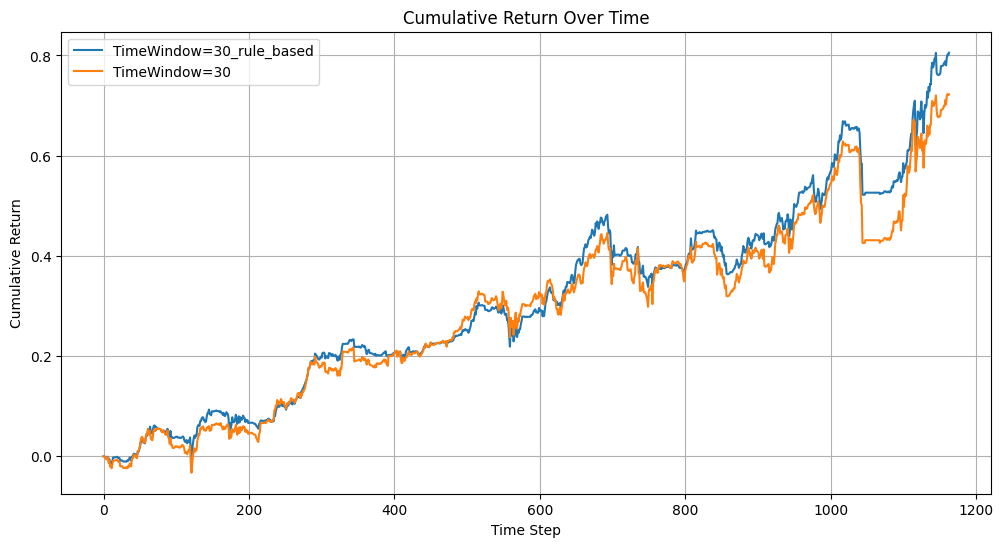

In [95]:
plot_cumulative_returns(all_tw_total_assests)